# Fuzzy String Matching in Python

There are many strings that referring to the same things but they are written slightly different, misspelled, have typos or written with the capital or small words.

During this project we want to match the fuzzy strings. Despite of lowering the words extra dot leads to the problem.

#   The Levenshtein Package
This metric calculates the minimum number of edits that is necessary to transform one word to other one. This metric was named after Vladimir Levenshtein, who originally considered it in 1965.

![Vladimir Levenshtein](lev.jpeg)


The package contains two functions which is written below
Detailed informations can be found in Wikipedia.

https://en.wikipedia.org/wiki/Levenshtein_distance



In [2]:
Str1 = "Apple Inc."
Str2 = "apple Inc"
Result = Str1.lower() == Str2.lower()
print(Result)

False


In [3]:
import Levenshtein as lev
Str1 = "Apple Inc."
Str2 = "apple Inc"
Distance = lev.distance(Str1.lower(),Str2.lower()),
print(Distance)
Ratio = lev.ratio(Str1.lower(),Str2.lower())
print(Ratio)

(1,)
0.9473684210526315


#  fuzzywuzzy
Similar to levenshtein, a ratio function that computes the standard Levenshtein distance similarity ratio between two sequences. You can see an example below.


<b>fuzz.ratio:</b> That ratio of similarity is the same as Levenshtein

<b>fuzz.partial_ratio():</b> The way this works is by using an "optimal partial" logic. In other words, if the short string has length k and the longer string has the length m, then the algorithm seeks the score of the best matching length-k substring.

The fuzz.token functions have an important advantage over ratio and partial_ratio. They tokenize the strings and preprocess them by turning them to lower case and getting rid of punctuation. In the case of <b>fuzz.token_sort_ratio()</b>, the string tokens get sorted alphabetically and then joined together. After that, a simple fuzz.ratio() is applied to obtain the similarity percentage. This allows cases such as court cases in this example to be marked as being the same.

95% similarity is that magic? No, it's just string preprocessing under the hood. In particular, <b>fuzz.token_set_ratio()</b> takes a more flexible approach than fuzz.token_sort_ratio(). Instead of just tokenizing the strings, sorting and then pasting the tokens back together, token_set_ratio performs a set operation that takes out the common tokens (the intersection) and then makes fuzz.ratio() pairwise comparisons between the following new strings:


intersection-only and the intersection with remainder of string one
intersection-only and the intersection with remainder of string two
intersection with remainder of one and intersection with remainder of two,

Attempts to rule out differences in the strings. Calls ratio on three particular substring sets and returns the max (code):
Notice that by splitting up the intersection and remainders of the two strings, we're accounting for both how similar and different the two strings are:

In [4]:
from fuzzywuzzy import fuzz

Str1 = "The supreme court case of Nixon vs The United States"
Str2 = "Nixon v. United States"
Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2)
print(Ratio)
print(Partial_Ratio)
print(Token_Sort_Ratio)
print(Token_Set_Ratio)

57
77
58
95


The fuzzywuzzy package has a module called process that allows you to calculate the string with the highest similarity out of a vector of strings. You can see how this works below:

In [5]:
from fuzzywuzzy import process
str2Match = "apple inc"
strOptions = ["Apple Inc.","apple park","apple incorporated","iphone"]
Ratios = process.extract(str2Match,strOptions)
print(Ratios)
# You can also select the string with the highest matching percentage
highest = process.extractOne(str2Match,strOptions)
print(highest)


[('Apple Inc.', 100), ('apple incorporated', 90), ('apple park', 67), ('iphone', 30)]
('Apple Inc.', 100)


# Searching for a person's name in a database: 

## NYSIIS 
Searching for a person's name in a database  is a unique challenge. Depending on the source and age of the data, you may not be able to count on the spelling of the name being correct, or even the same name being spelled the same way when it appears more than once.  

A common way to solve the string-search problem is to look for values that are "close" to the same as the search target. Using a traditional "fuzzy match" algorithm to compute the closeness of two arbitrary strings is expensive, though, and it isn't appropriate for searching large data sets. 


A better solution is to compute hash values for entries in the database in advance, and several special hash algorithms have been created for this purpose. These phonetic hash algorithms allow you to compare two words or names based on how they sound, rather than the precise spelling.


## DMetaphone 
The Metaphone algorithm is significantly more complicated than the others because it includes special rules for handling spelling inconsistencies and for looking at combinations of consonants in addition to some vowels. An updated version of the algorithm, called Double Metaphone, goes even further by adding rules for handling some spellings and pronunciations from languages other than English.


In [6]:
import numpy as np
import fuzzy

names = [ 'Catherine', 'Katherine', 'Katarina',
          'Johnathan', 'Jonathan', 'John',
          'Teresa', 'Theresa',
          'Smith', 'Smyth',
          'Jessica',
          'Joshua',
          ]

for n in names:
    print('%-20s' % n, fuzzy.nysiis(n))

Catherine            CATARAN
Katherine            CATARAN
Katarina             CATARAN
Johnathan            JANATAN
Jonathan             JANATAN
John                 JAN
Teresa               TARAS
Theresa              TARAS
Smith                SNATH
Smyth                SNATH
Jessica              JASAC
Joshua               JAS


# Project: 

The dataset it the list of best selling book published by New York Times since  1930. We want to see the variation of gender distubution of authors during the time. The initial dataset is from 2008 to 2017.

In [7]:
# Importing the pandas module
import pandas as pd

# Reading in datasets/nytkids_yearly.csv, which is semicolon delimited.
author_df = pd.read_csv('datasets/kids_book.csv', delimiter=';')

In [8]:
author_df.head()

,Year,Book Title,Author,Besteller this year
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28


In [9]:
author_df["First_name"] = author_df["Author"].str.split(" ", n = 1, expand = True)[0]

We will now create a new column or list that contains the phonetic equivalent of every first name that we just extracted.

In [10]:
author_df["Fuzzy"] = [fuzzy.nysiis(n) for n in author_df["First_name"]]
author_df.head()

,Year,Book Title,Author,Besteller this year,First_name,Fuzzy
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR


In [11]:
first_name_unique = np.unique(author_df['First_name'])
fuzzy_unique = np.unique(author_df['Fuzzy'])


To identify if a name is male or female we use the dataset of Social Security Administration’s baby name data. We add the new column for higher probability of a girl or a boy.

In [12]:
babies_df = pd.read_csv('datasets/babynames_nysiis.csv', delimiter = ';')
babies_df.head()

,babynysiis,perc_female,perc_male
0,NaN,62.50,37.50
1,RAX,63.64,36.36
2,ESAR,44.44,55.56
3,DJANG,0.00,100.00
4,PARCAL,25.00,75.00


In [13]:
babies_df['gender'] = 'M'

for i in range(len(babies_df)):
    if babies_df['perc_female'][i] > babies_df['perc_male'][i]: 
       babies_df['gender'][i] = 'F'
    

/home/hamid/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:

babies_df.head(10)

,babynysiis,perc_female,perc_male,gender
0,NaN,62.50,37.50,F
1,RAX,63.64,36.36,F
2,ESAR,44.44,55.56,M
3,DJANG,0.00,100.00,M
4,PARCAL,25.00,75.00,M
5,VALCARY,100.00,0.00,F
6,FRANCASC,63.64,36.36,F
7,CABAT,50.00,50.00,M
8,XANDAR,16.67,83.33,M
9,RACSAN,33.33,66.67,M


The main goal is that we take the Fuzzy words from (author_df["Fuzzy"]) and check them in the babies_df['babynysiis'] clumn. From that we get index number of that row. And we use this index number of that row in the babies_df['gender'] column to find is it F or M

In [18]:
gender_list = []
for i in author_df["Fuzzy"]:
    elem= list(babies_df['babynysiis']).index(i) if i in list(babies_df['babynysiis']) else -1
    if (elem== -1):
        gender_list.append('Unknown')
    else:
        gender_list.append(babies_df['gender'][elem])
    
author_df["Gender"] = gender_list
author_df['Gender'].value_counts()

F          395
M          199
Unknown      9
Name: Gender, dtype: int64

In [19]:
author_df.head()

,Year,Book Title,Author,Besteller this year,First_name,Fuzzy,Gender
0,2017,DRAGONS LOVE TACOS,Adam Rubin,49,Adam,ADAN,M
1,2017,THE WONDERFUL THINGS YOU WILL BE,Emily Winfield Martin,48,Emily,ENALY,F
2,2017,THE DAY THE CRAYONS QUIT,Drew Daywalt,44,Drew,DR,M
3,2017,"ROSIE REVERE, ENGINEER",Andrea Beaty,38,Andrea,ANDR,M
4,2017,"ADA TWIST, SCIENTIST",Andrea Beaty,28,Andrea,ANDR,M


We can see that there are more Female than mails in the table.
At the next step we look at the variatoin of number of F and M during the 2008 to 2017.

In [149]:
# Creating a list of unique years, sorted in ascending order.
years = list(np.unique(author_df['Year']))
genders = list(np.unique(author_df['Gender']))

new_dict2 = dict()


# Here it filters the table by years such as 2017 and gender like M and coun
for j in genders:
    new_dict = dict() 
    for i in years:
        bolian_gender = (author_df['Gender']==j)  # Out put is a list of True  True False False
        bolian_year= (author_df['Year']==i)  # Out put is a list of True  True False False
        z = len(author_df[bolian_year & bolian_gender]) # only keep the row with this two conditions. we count it by lenght
        new_dict.update( {i : z} )
    #pprint(j, new_dict)
    #print(new_dict)
    new_dict2.update( {j : new_dict} )
print(new_dict2)


{'F': {2008: 15, 2009: 45, 2010: 48, 2011: 51, 2012: 46, 2013: 51, 2014: 34, 2015: 30, 2016: 32, 2017: 43}, 'M': {2008: 9, 2009: 19, 2010: 28, 2011: 22, 2012: 23, 2013: 12, 2014: 22, 2015: 18, 2016: 26, 2017: 20}, 'Unknown': {2008: 1, 2009: 3, 2010: 0, 2011: 1, 2012: 0, 2013: 2, 2014: 1, 2015: 0, 2016: 0, 2017: 1}}


       F   M  Unknown
2008  15   9        1
2009  45  19        3
2010  48  28        0
2011  51  22        1
2012  46  23        0
2013  51  12        2
2014  34  22        1
2015  30  18        0
2016  32  26        0
2017  43  20        1


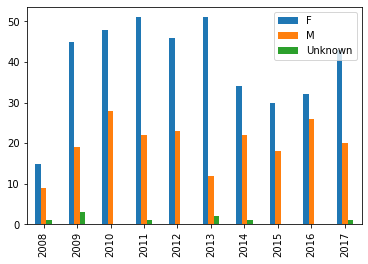

In [150]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(new_dict2)
print(df)

df.plot.bar()